# Title

## Data Exploration

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./heart_2020_cleaned.csv')

In [2]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


Our dataset has 319,795 observations and 17 features and the target column `HeartDisease`.

In [3]:
df.shape

(319795, 18)

In [4]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

We can see there is no missing data or null values to fill in, so we will now encode our data.

The following code prints out the unique values for the categorical variables, to help us understand our data and better encode the data.

In [5]:
categoricals = df.select_dtypes(include=['object']).columns.tolist()
for cat in categoricals:
    print(f'{cat}: {sorted(df[cat].unique())}')

HeartDisease: ['No', 'Yes']
Smoking: ['No', 'Yes']
AlcoholDrinking: ['No', 'Yes']
Stroke: ['No', 'Yes']
DiffWalking: ['No', 'Yes']
Sex: ['Female', 'Male']
AgeCategory: ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']
Race: ['American Indian/Alaskan Native', 'Asian', 'Black', 'Hispanic', 'Other', 'White']
Diabetic: ['No', 'No, borderline diabetes', 'Yes', 'Yes (during pregnancy)']
PhysicalActivity: ['No', 'Yes']
GenHealth: ['Excellent', 'Fair', 'Good', 'Poor', 'Very good']
Asthma: ['No', 'Yes']
KidneyDisease: ['No', 'Yes']
SkinCancer: ['No', 'Yes']


TODO: Describe this ^^^^^^
## Categorical Variables
#### HeartDisease 
* Whether survey respondents reported having heart disease (either coronary heart disease or myocardial infarction)
* Possible values: Yes, No
#### Smoking
* Whether survey participants have smoked greater than or equal to 100 cigarettes (5 packs) in their lifetime
* Possible values: Yes, No
#### Alcohol Drinking
* Whether survey respondents are heavy drinkers (adult men who have over 14 drinks per week or adult women who have over 7 drink per week)
* Possible values: Yes, No
#### Stroke
* Whether the respondents have ever had a stroke
* Possible values: Yes, No
#### DiffWalking
* Whether respondents have serious difficulty climbing stairs or walking in general
* Possible values: Yes, No
#### Sex
* Biological sex of respondent
* Possible values: Male, Female
#### AgeCategory
* Which of 14 levels of age categories respondents fall into
* Possible Values: 18-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59, 60-64, 65-69, 70-74, 75-79, 80 or older
#### Race
* Race category of respondent
* Possible values: American Indian/Alaskan Native, Asian, Black, Hispanic, Other, White
#### Diabetic
* Whether the respondents have ever been told they have diabetes
* Possible values: No; No, borderline diabetes; Yes; Yes (during pregnancy)
#### Physical Activities
* Whether respondents reported physical activity or exercise within the last 30 days outside their regular jobs
* Possible values: Yes, No
#### GenHealth
* How respondents would describe their general health
* Possible values: Excellent, Fair, Good, Poor, Very good
#### Asthma
* Whether respondents have ever been told they have asthma
* Possible values: Yes, No
#### KidneyDisease
* Whether respondents have ever been told they have kidney disease (other than kidney stones, bladder infection, incontinence)
* Possible values: Yes, No
#### Skin Cancer
* Whether respondents have ever been told they have skin cancer
* Possible values: Yes, No


TODO: PLOT HOW MUCH OF EACH UNIQUE CATEGORY IN EACH CATEGORICAL VARIABLE
GENERATE HISTOGRAM FOR CATEGORICAL DATA

<AxesSubplot: xlabel='HeartDisease', ylabel='Count'>

<AxesSubplot: xlabel='Smoking', ylabel='Count'>

<AxesSubplot: xlabel='AlcoholDrinking', ylabel='Count'>

<AxesSubplot: xlabel='Stroke', ylabel='Count'>

<AxesSubplot: xlabel='DiffWalking', ylabel='Count'>

<AxesSubplot: xlabel='Sex', ylabel='Count'>

<AxesSubplot: xlabel='AgeCategory', ylabel='Count'>

<AxesSubplot: xlabel='Race', ylabel='Count'>

<AxesSubplot: xlabel='Diabetic', ylabel='Count'>

<AxesSubplot: xlabel='PhysicalActivity', ylabel='Count'>

<AxesSubplot: xlabel='GenHealth', ylabel='Count'>

<AxesSubplot: xlabel='Asthma', ylabel='Count'>

<AxesSubplot: xlabel='KidneyDisease', ylabel='Count'>

<AxesSubplot: xlabel='SkinCancer', ylabel='Count'>

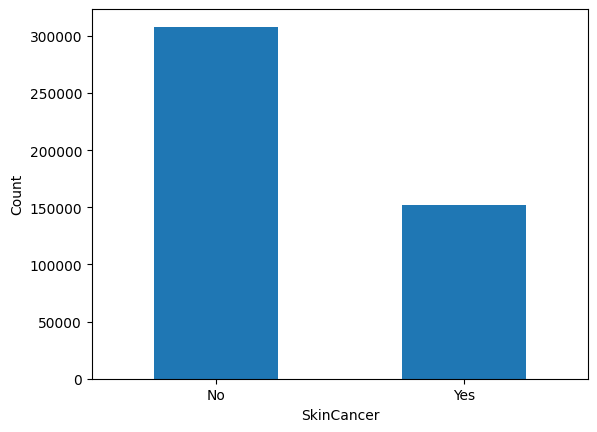

In [6]:
for c in categoricals:
    display(df[c].value_counts().plot(kind='bar', xlabel=c, ylabel='Count', rot=0))

It doesn't make much sense to include our categorical variables in the correlation matrix below (even after encoding) as they mostly aren't consisting of ordered scales, instead they are almost all binary valued.

<AxesSubplot: >

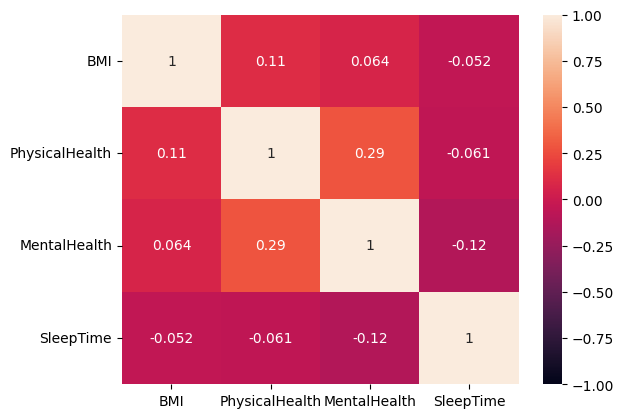

In [7]:
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, center=0, annot=True, cmap='rocket')

Below we can see relations between numerical data and the distributions each type of data. For BMI we see a bit of a skewed normal distribution, but for the rest there appears to be some discrete aspect of separation to the data values, especially with sleep time. We also can't really see much of a clear linear relationship in the scatter plots which matches with the low correlation that we see in the correlation matrix.

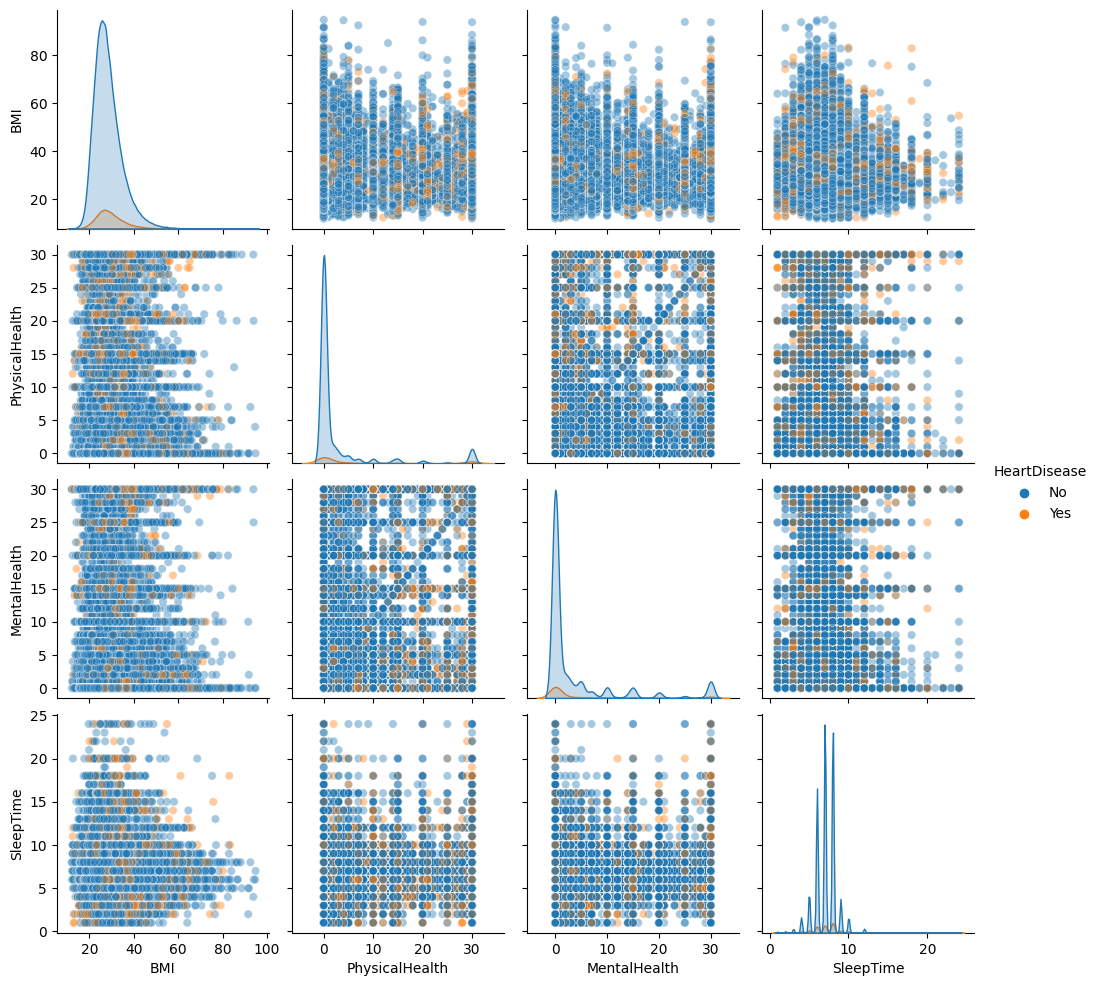

In [10]:
sns.pairplot(df, hue='HeartDisease', plot_kws=dict(alpha=0.4))

See below for the discrete integer nature of the specified variables for confirmation of what we noticed above with the histograms

In [8]:
df['SleepTime'].unique() # see the discrete integer values 

array([ 5.,  7.,  8.,  6., 12.,  4.,  9., 10., 15.,  3.,  2.,  1., 16.,
       18., 14., 20., 11., 13., 17., 24., 19., 21., 22., 23.])

In [9]:
df['MentalHealth'].unique()

array([30.,  0.,  2.,  5., 15.,  8.,  4.,  3., 10., 14., 20.,  1.,  7.,
       24.,  9., 28., 16., 12.,  6., 25., 17., 18., 21., 29., 22., 13.,
       23., 27., 26., 11., 19.])

In [10]:
df['PhysicalHealth'].unique()

array([ 3.,  0., 20., 28.,  6., 15.,  5., 30.,  7.,  1.,  2., 21.,  4.,
       10., 14., 18.,  8., 25., 16., 29., 27., 17., 24., 12., 23., 26.,
       22., 19.,  9., 13., 11.])

With a wide variety of features such as pre-existing health conditions, and general lifestyle information such as level of physical activity, or drinking alcohol, this data set provides us with a large amount of information to perform a binary classification on the presence of heart disease in an individual. 

Some potential biases arise however when considering the source of the data, as this is data collected from a voluntary response phone poll, which means that there could be a significant difference between people who answer phone polls and people who don't. Additionally, the data collected from the poll could also have inaccuracies, as it is possible people lie or exaggerate about their lifestyle habits such as exercise or alcohol consumption. 

Aside from any potential biases from the collection of the data, this data set provides a great opportunity to try and predict the likelihood of heart disease in an individual based on their pre-existing health conditions and their broad lifestyle habits.

## Data Preprocessing

In [11]:
encode = lambda unique: dict( zip( sorted(unique), range(len(unique)) ) )

# encode( df[categoricals[0]].unique() )
encoding = {'GenHealth': {'Poor': 0, 'Fair': 1, 'Good': 2, 'Very good': 3, 'Excellent': 4}}

# perform genhealth encoding manually since no sorting function
df_encode = df.copy()
for c in categoricals:
  if c != 'GenHealth': encoding[c] = encode(df[c].unique()) # save to encoding
  df_encode[c] = df.apply( lambda row: encoding[c][row[c]], axis=1) # perform encoding

encoding

{'GenHealth': {'Poor': 0,
  'Fair': 1,
  'Good': 2,
  'Very good': 3,
  'Excellent': 4},
 'HeartDisease': {'No': 0, 'Yes': 1},
 'Smoking': {'No': 0, 'Yes': 1},
 'AlcoholDrinking': {'No': 0, 'Yes': 1},
 'Stroke': {'No': 0, 'Yes': 1},
 'DiffWalking': {'No': 0, 'Yes': 1},
 'Sex': {'Female': 0, 'Male': 1},
 'AgeCategory': {'18-24': 0,
  '25-29': 1,
  '30-34': 2,
  '35-39': 3,
  '40-44': 4,
  '45-49': 5,
  '50-54': 6,
  '55-59': 7,
  '60-64': 8,
  '65-69': 9,
  '70-74': 10,
  '75-79': 11,
  '80 or older': 12},
 'Race': {'American Indian/Alaskan Native': 0,
  'Asian': 1,
  'Black': 2,
  'Hispanic': 3,
  'Other': 4,
  'White': 5},
 'Diabetic': {'No': 0,
  'No, borderline diabetes': 1,
  'Yes': 2,
  'Yes (during pregnancy)': 3},
 'PhysicalActivity': {'No': 0, 'Yes': 1},
 'Asthma': {'No': 0, 'Yes': 1},
 'KidneyDisease': {'No': 0, 'Yes': 1},
 'SkinCancer': {'No': 0, 'Yes': 1}}

We will be using one-hot encoding for race, as race is not a scale nor is it binary.

In [12]:
df_encode['American Indian/Alaskan Native'] = df_encode.apply( lambda x: int(x.Race == 0), axis=1)
df_encode['Asian'] = df_encode.apply( lambda x: int(x.Race == 1), axis=1)
df_encode['Black'] = df_encode.apply( lambda x: int(x.Race == 2), axis=1)
df_encode['Hispanic'] = df_encode.apply( lambda x: int(x.Race == 3), axis=1)
df_encode['White'] = df_encode.apply( lambda x: int(x.Race == 5), axis=1)
df_encode['Other Race'] = df_encode.apply( lambda x: int(x.Race == 4), axis=1)

In [13]:
# uncomment to sanity check results
# df_encode_races = df_encode[['Race', 'Asian', 'Black', 'Hispanic', 'American Indian/Alaskan Native', 'White', 'Other Race']]
df_encode = df_encode.drop(columns=['Race'])

Now that our races are encoded, we will check the distribution of races as percentages.

In [14]:
races = df_encode[['Asian', 'Black', 'Hispanic', 'American Indian/Alaskan Native', 'White', 'Other Race']].sum()
print(races / races.sum() * 100)

Asian                              2.522866
Black                              7.173033
Hispanic                           8.582373
American Indian/Alaskan Native     1.626667
White                             76.677872
Other Race                         3.417189
dtype: float64


We can see that the most common race in our dataset is White at 76%, followed by Hispanic at 8.5%, and Black at 7.1%. 
This presents a possible source of bias in our model, as our model will likely be more effective at predicting heart disease in white people than other racial groups due to the sample size if race ends up being an important factor.

We encoded all categorical variables into numerical values. For race we did one hot encoding as race is not a scale nor is it binary, as otherwise a trained model could view White with a value of 5 as the polar opposite of American Indian/Alaskan Native with a value of 0. We did not adjust the scale of any of the features, as most features are binary encoded, with Age having the absolute largest value with a max value of 12. As such, huge values will likely not be too much of an issue with slowing down model training with larger values in back propogation, so as such, data will likely not need to be transformed, scaled, or normalized for a fast and effective model training.